In [1]:
import sys

sys.path.append("../")  # go to parent dir

%load_ext autoreload
%autoreload 2


from pathlib import Path
from matplotlib import pyplot as plt
from ddmtools.analysis import DDM
import numpy as np

project_path = Path(".").resolve()
data_path = project_path / "data"

experiment = "2BD01_1__middle1"
experiment_path = data_path / experiment

MAX_WORKERS = 4

In [2]:
CROP_SIZE = (512, 512)


ddm = DDM.from_folder(
    experiment_path,
    framerate=1.0,
    micrometre_per_pixel=0.234,
    temperature=273.0 + 21.0,
    viscosity=0.9775e-3,
)
# patch framerate
ddm.framerate = len(ddm.stack) / 10.0

ddm.stack.crop(CROP_SIZE)
ddm.stack.preload()
ddm.stack.compress()


Text(0.5, 0.98, 'Frame 1 - Frame 2')

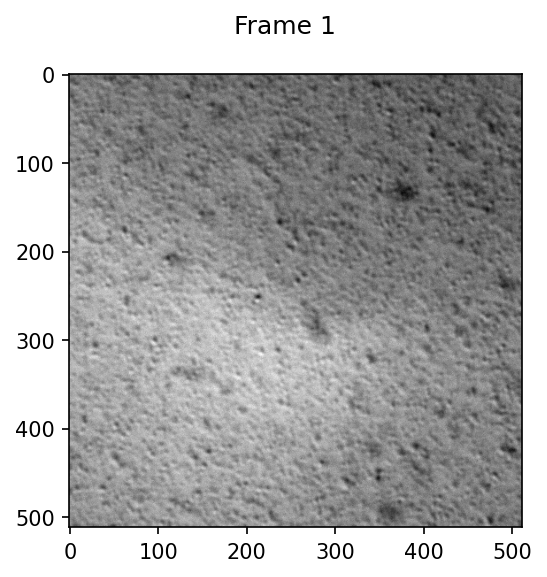

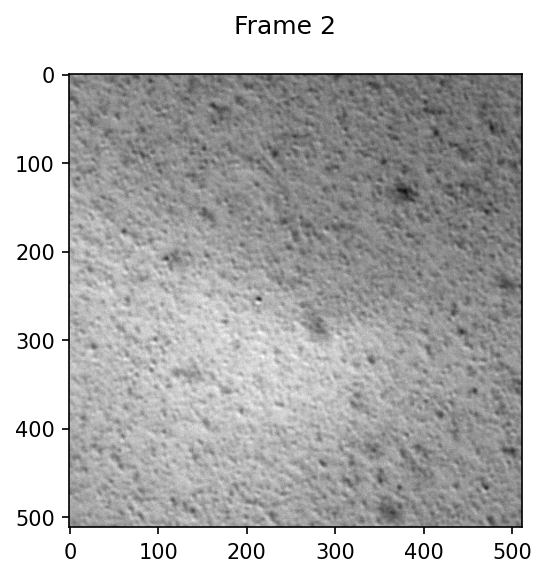

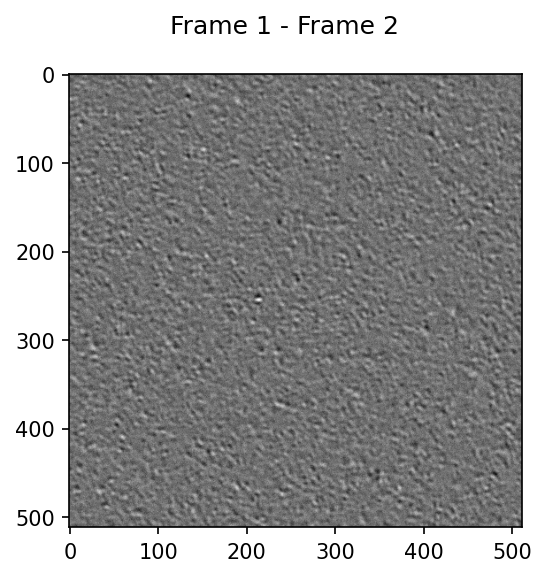

In [3]:
frame1 = ddm.stack[10]
frame2 = ddm.stack[20]

fig = plt.figure(dpi=150)
plt.imshow(frame1, plt.cm.gray)
fig.suptitle("Frame 1")

fig = plt.figure(dpi=150)
plt.imshow(frame2, plt.cm.gray)
fig.suptitle("Frame 2")

fig = plt.figure(dpi=150)
plt.imshow(frame1 - frame2, plt.cm.gray)
fig.suptitle("Frame 1 - Frame 2")

Text(0.5, 0.98, 'Differential Spectrum')

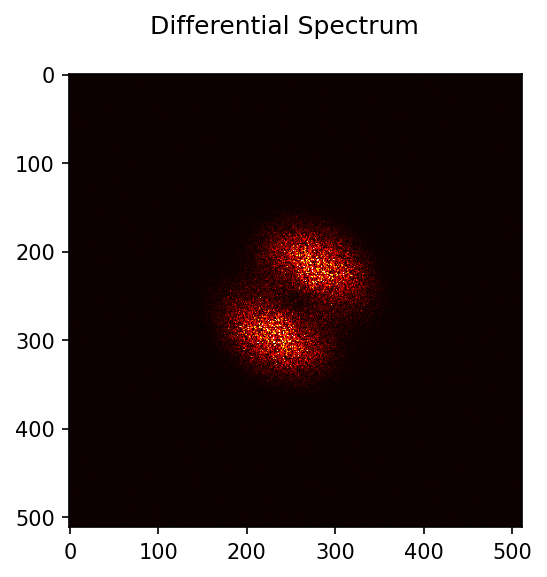

In [4]:
# Show a differential spectrum
diff = ddm.get_differential_spectrum(10, 20)
fig = ddm.plot_differential_spectrum(diff, 3)
fig.set_dpi(150)
fig.suptitle("Differential Spectrum")

Text(0.5, 0.98, 'Frame 1, Time averaged signal')

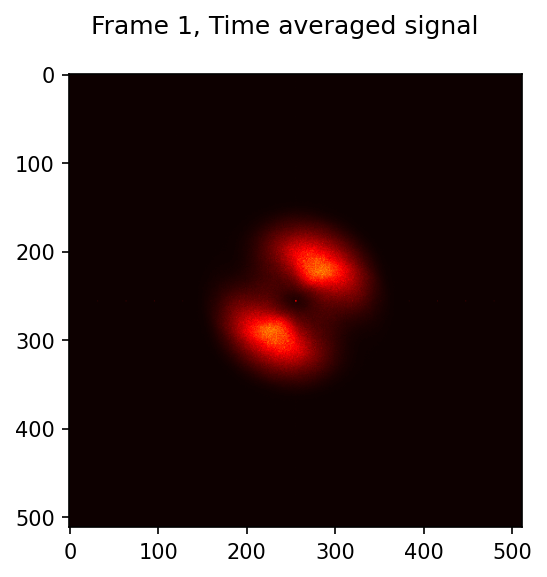

In [5]:
# Show time average
average = ddm.get_time_average(10, max_couples=300)

fig = ddm.plot_time_average(average, brightness=1.0)
fig.set_dpi(150)
fig.suptitle("Frame 1, Time averaged signal")

<Figure size 900x600 with 0 Axes>

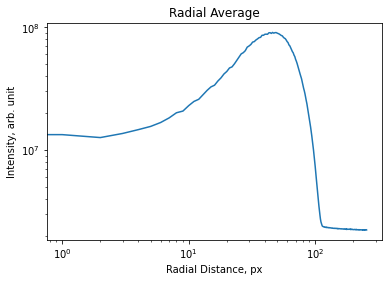

In [6]:
# Show radial average
# We can radially average since we expect isotropy

rad_average = ddm.get_radial_average(average)
fig = ddm.plot_radial_average(rad_average)
fig

In [7]:
# taus = ddm.get_log_spaced_taus(300)
taus = np.array(list(range(1, len(ddm.stack))))
# taus = np.array(range(len(ddm.stack)))

times = ddm.taus_to_times(taus)
iqtaus = ddm.analyse(taus, max_couples=100, workers=MAX_WORKERS)

  0%|          | 0/988 [00:00<?, ?it/s]

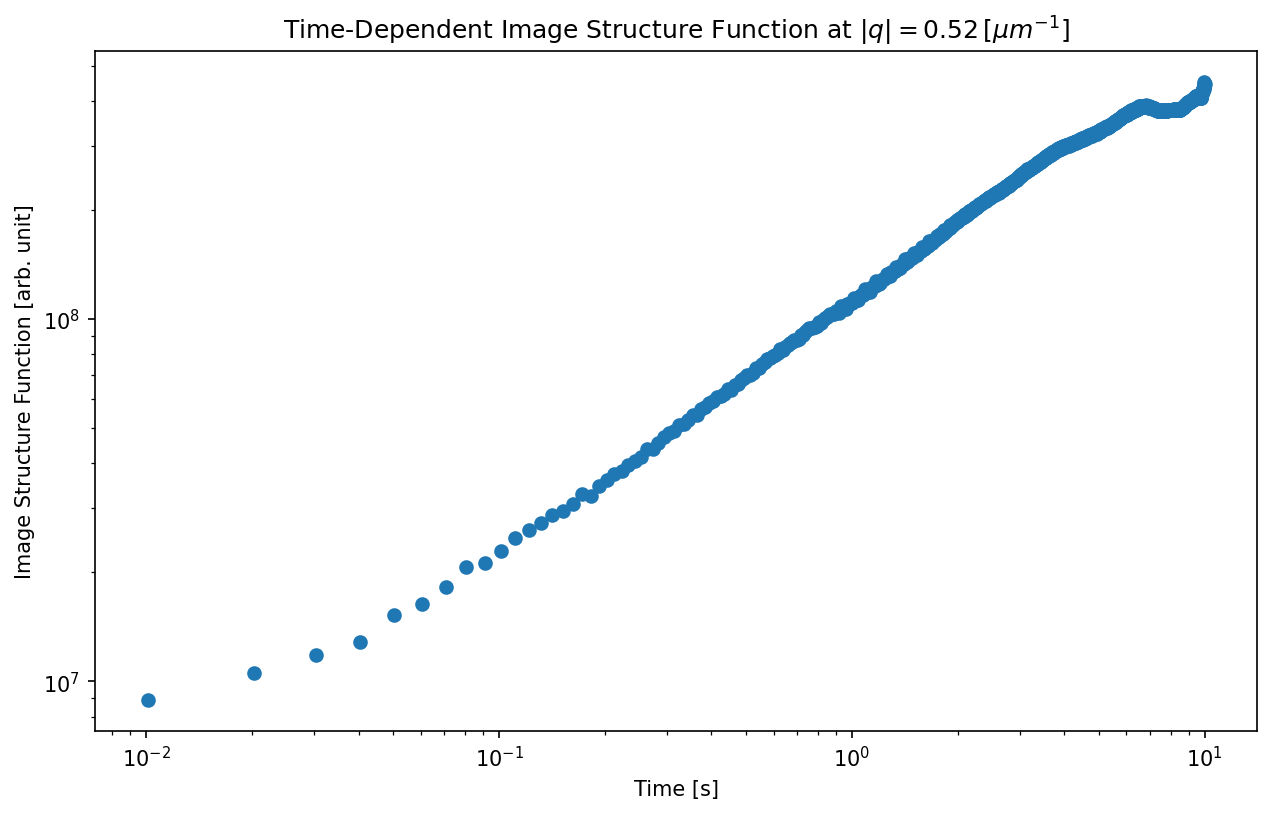

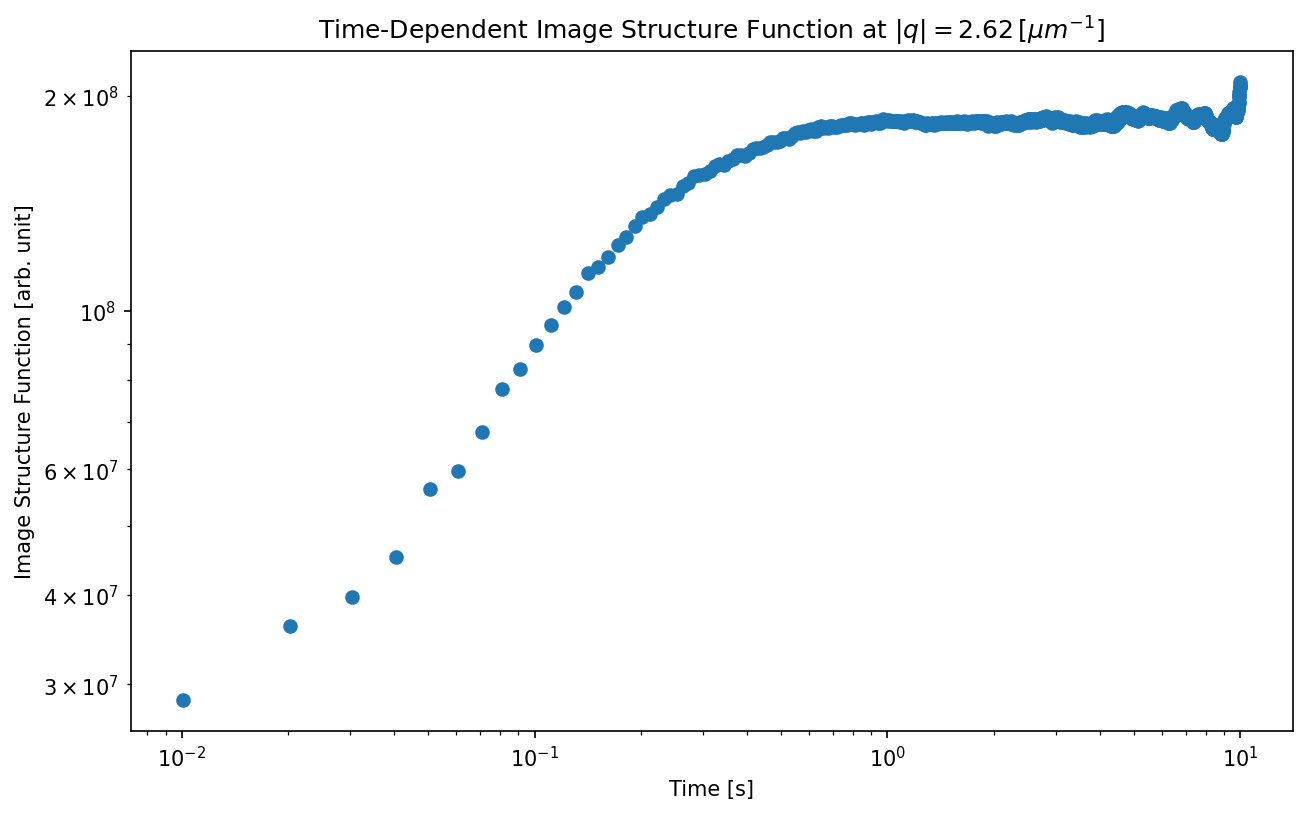

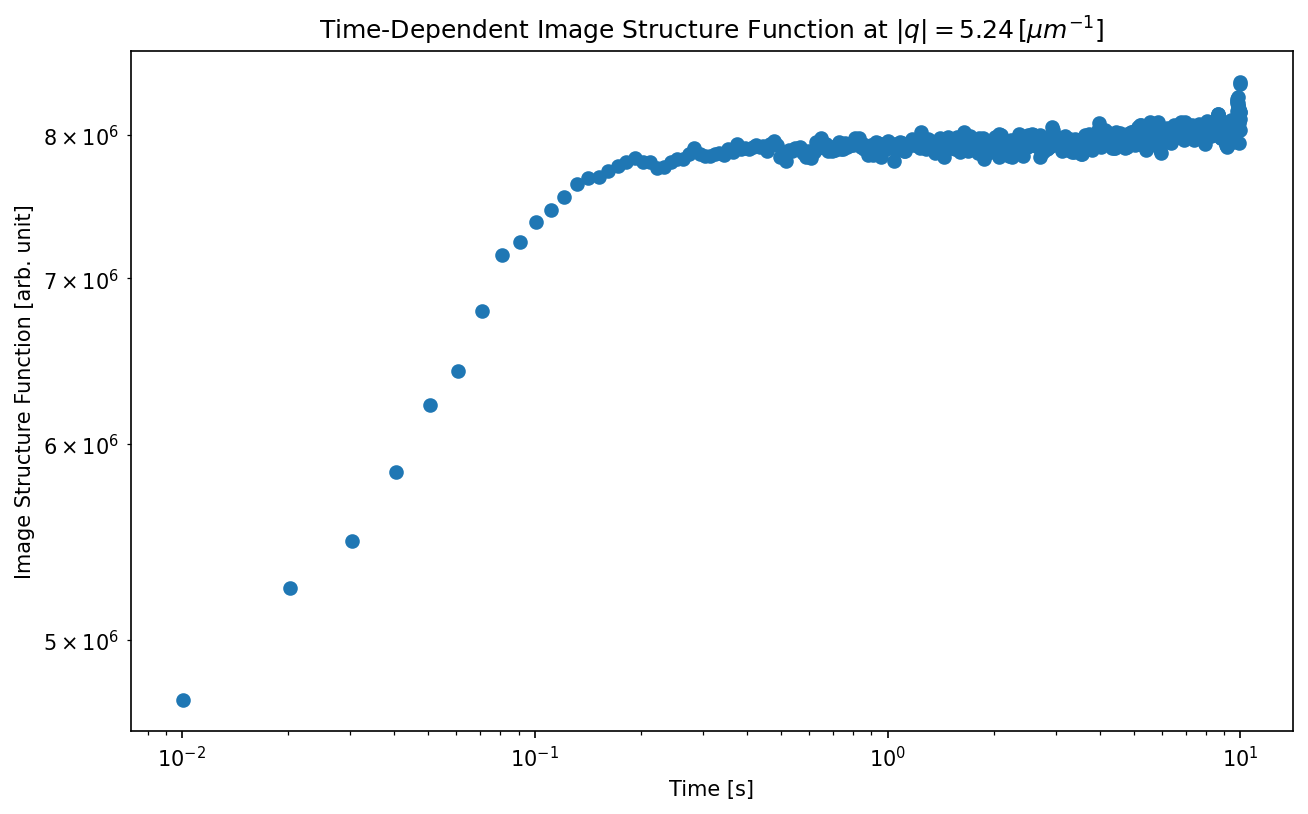

In [8]:
fig = ddm.plot_image_structure_function(10)
fig = ddm.plot_image_structure_function(50)
fig = ddm.plot_image_structure_function(100)

In [9]:
qs = ddm.iqtaus_to_qs()
print(len(times), len(qs))

988 256


In [15]:

# %lprun -f ddm.fit_image_structure_functions_lmfit ddm.fit_image_structure_functions_lmfit(1)
dispersity_order = 3
min_result = ddm.fit_image_structure_functions_polydisperse(dispersity_order, method_sequence=["least_squares"], max_nfev=100_000)
# a.params.pretty_print()

# DOF = (n-1) + q(1+1+1+(n-1))
# DOF = -1 + n + q(2+n)
# DOF = -1 + n + +2q + qn
# DOF = qn + 2q + n -1
# q = 64, n = 1 => DOF = 192
# q = 64, n = 2 => DOF = 257
# q = 64, n = 3 => DOF = 322
# q = 64, n = 4 => DOF = 387
# q = 64, n = 5 => DOF = 452
# q = 64, n = 6 => DOF = 517

# Speed: (for 10000 evals, N=2, q = 64)
# loop based method: 1:41
# Array based method: 40.4
# Array based method with njit: 1:27
# Array based method with fastmath: 1:27

print(f"Objective function evaluations: {min_result.minimizer_result.nfev}")




# assert False  # Prevent running over

  0%|          | 0/100000 [00:00<?, ?it/s]

Doing fit 1/1 using method `least_squares`...


/home/jk782/Code/DDM/.venv/lib/python3.9/site-packages/ddmtools/isf.py:133: RuntimeWarning: invalid value encountered in log
  log_guess = np.log(guess)


Done.
Objective function evaluations: 9


In [16]:
min_result.minimizer_result.params

name,value,standard error,relative error,initial value,min,max,vary,expression
beta_0,1.00000000,0.00000000,(0.00%),1,0.00000000,1.00000000,False,1
beta_1,0.51525713,0.08871574,(17.22%),0.5,0.00000000,1.00000000,True,
beta_2,0.22786494,0.04069844,(17.86%),0.25,0.00000000,1.00000000,True,
A_0,63061005.7,389210.620,(0.62%),66379117.96468785,0.00000000,inf,True,
A_1,90975891.0,4242268.18,(4.66%),129746620.22422981,0.00000000,inf,True,
A_2,1.7207e+08,12237145.6,(7.11%),228230283.55662775,0.00000000,inf,True,
A_3,1.4753e+08,4660819.05,(3.16%),160045686.69712818,0.00000000,inf,True,
A_4,3.5684e+08,27864799.2,(7.81%),460351375.623759,0.00000000,inf,True,
A_5,1.9635e+08,5735914.30,(2.92%),229879144.58846098,0.00000000,inf,True,
A_6,3.3213e+08,14899912.3,(4.49%),399127687.22718,0.00000000,inf,True,


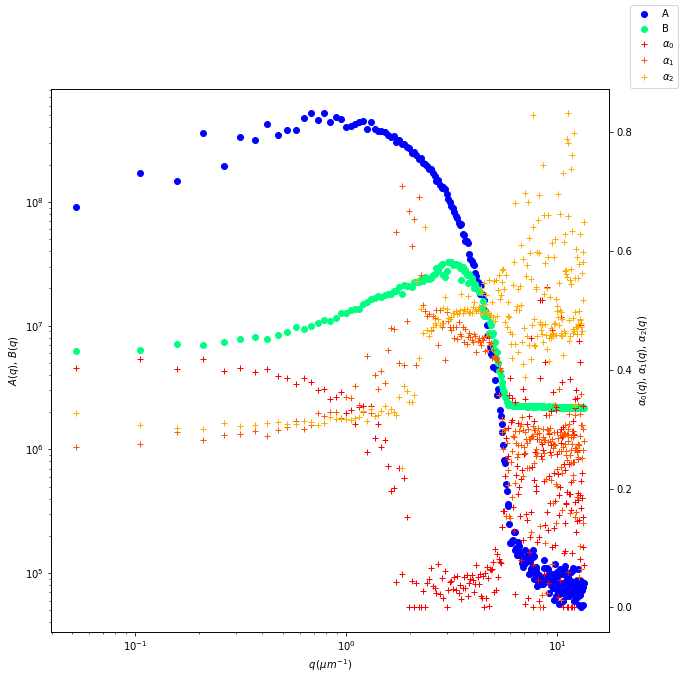

In [17]:
fig = min_result.plot_image_structure_function_params()

/home/jk782/Code/DDM/.venv/lib64/python3.9/site-packages/pandas/core/arraylike.py:364: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/home/jk782/Code/DDM/.venv/lib64/python3.9/site-packages/pandas/core/arraylike.py:364: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/home/jk782/Code/DDM/.venv/lib64/python3.9/site-packages/pandas/core/arraylike.py:364: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


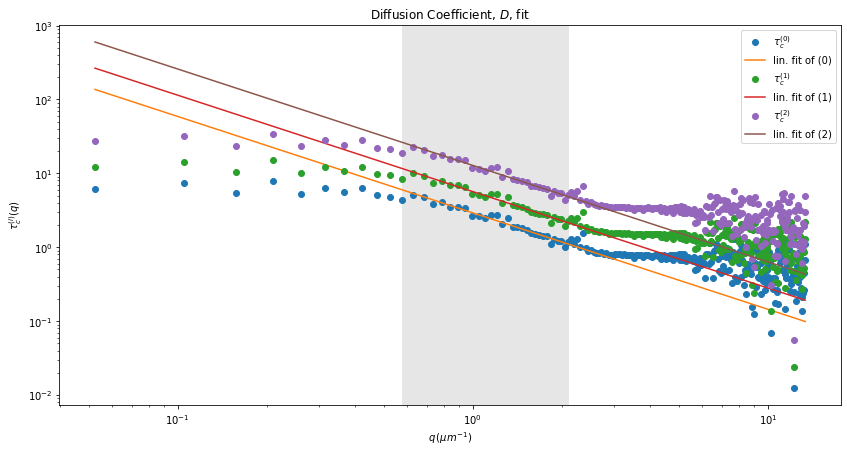

In [22]:
fit_result = min_result.fit_diffusion_coefficients(minimal_r_squared=0.97)
fig = fit_result.plot_diffusion_coeff_fit()


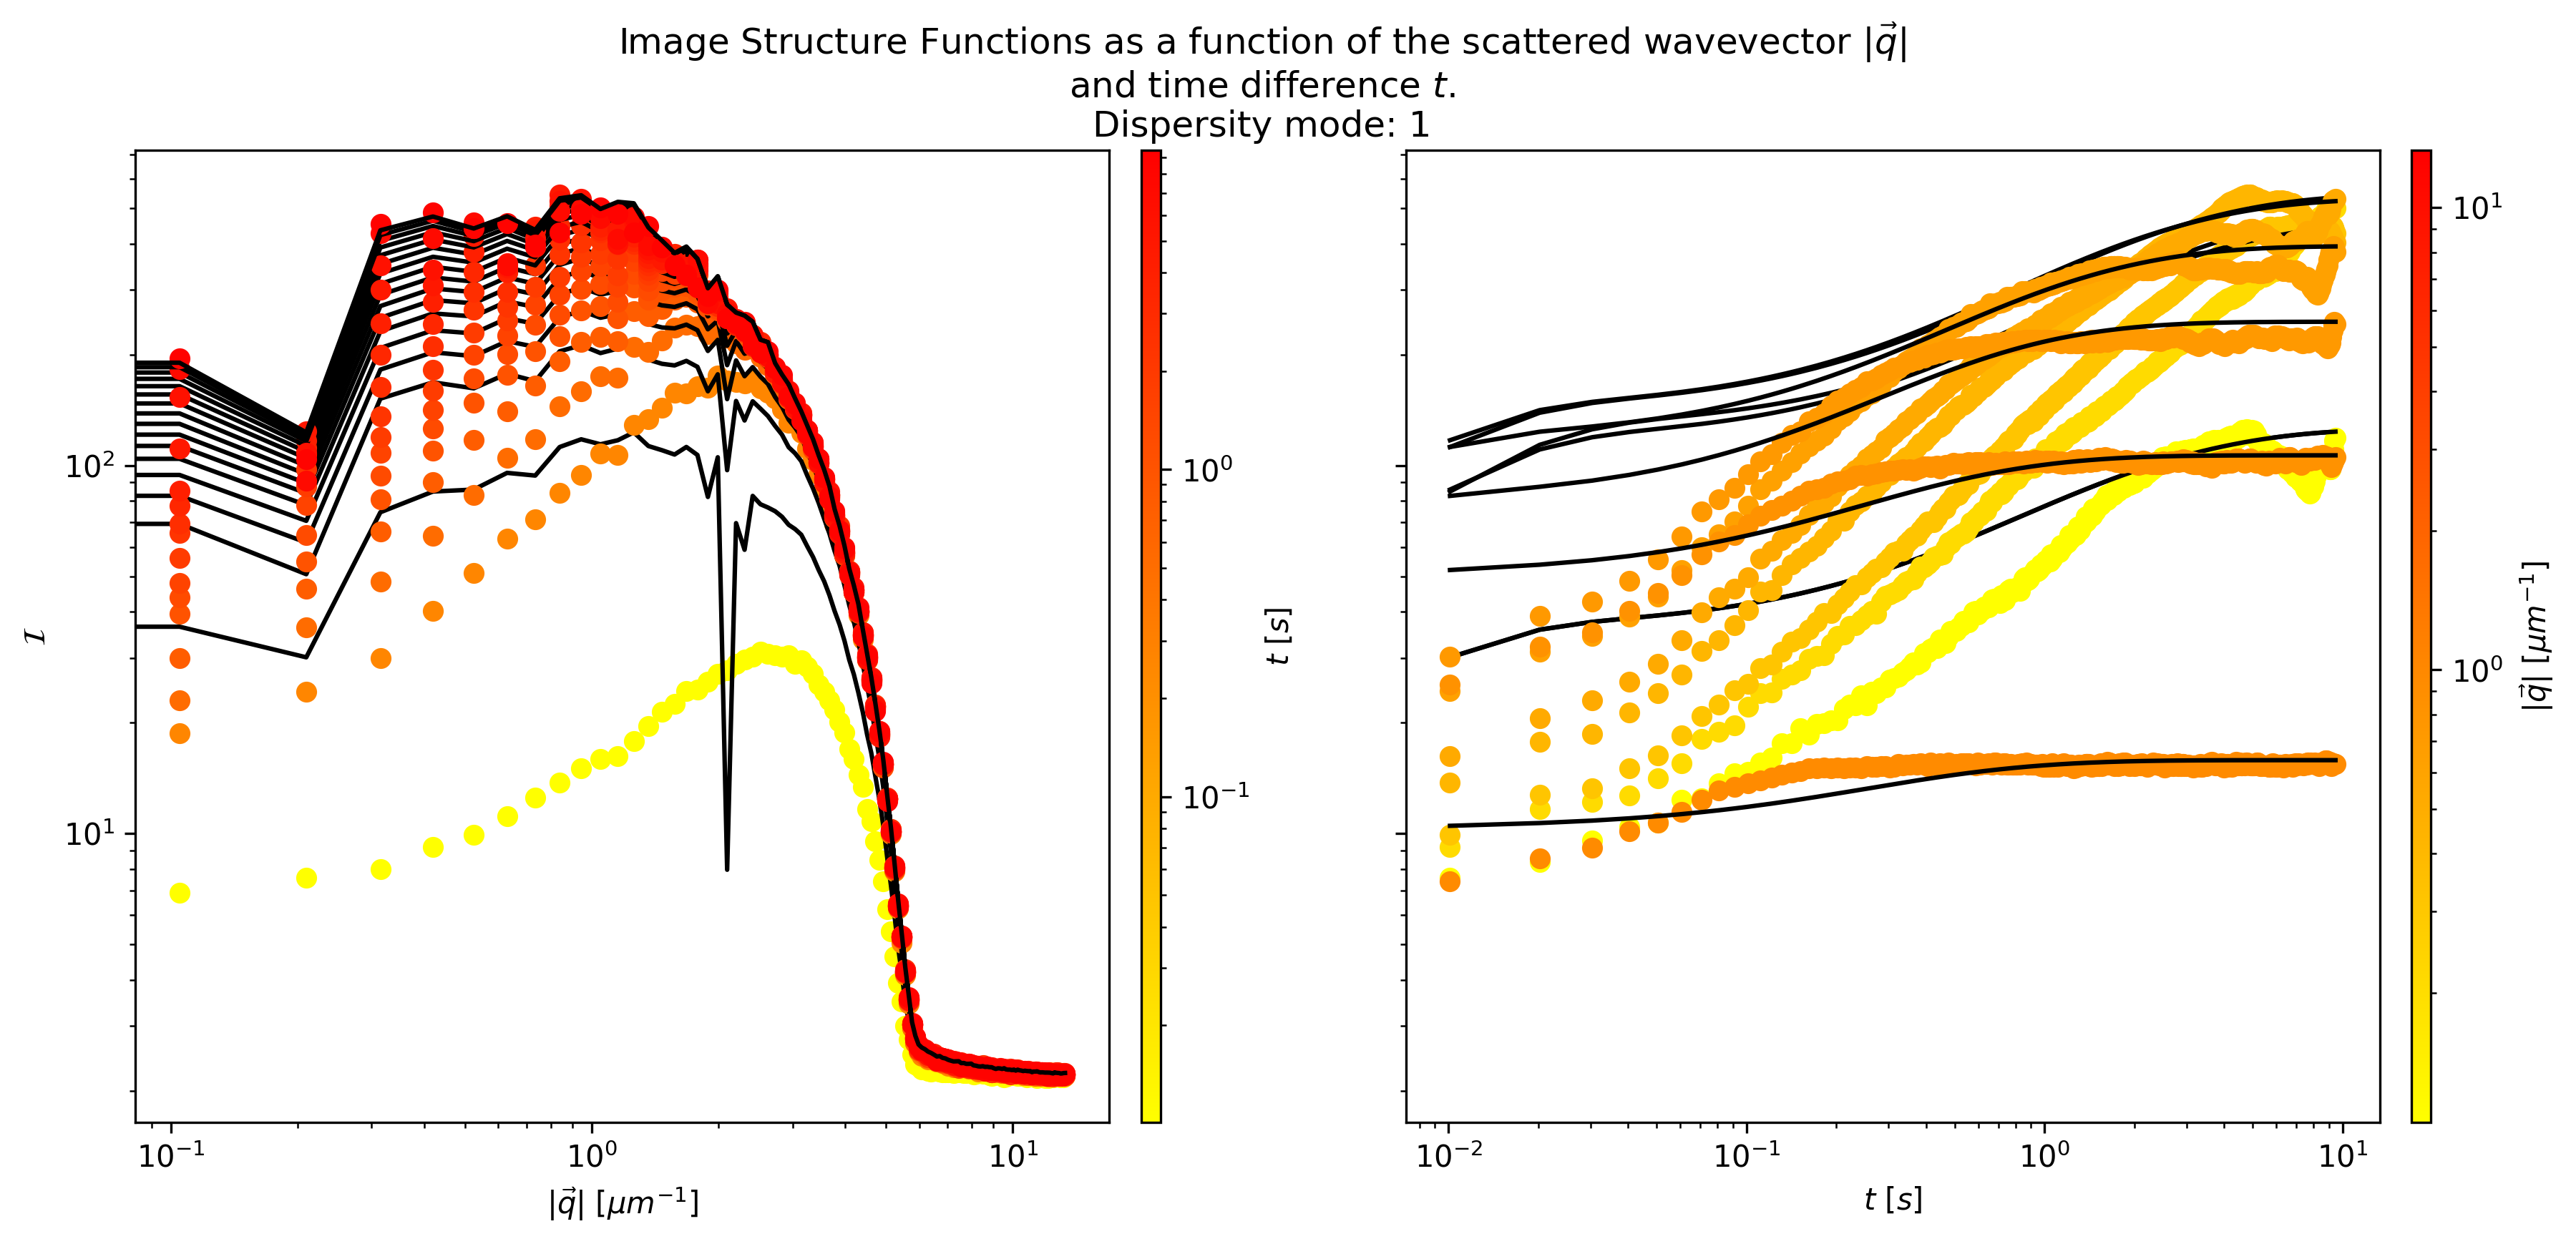

In [ ]:
fig = fit_result.plot_image_structure_functions(1, q_interval=25)

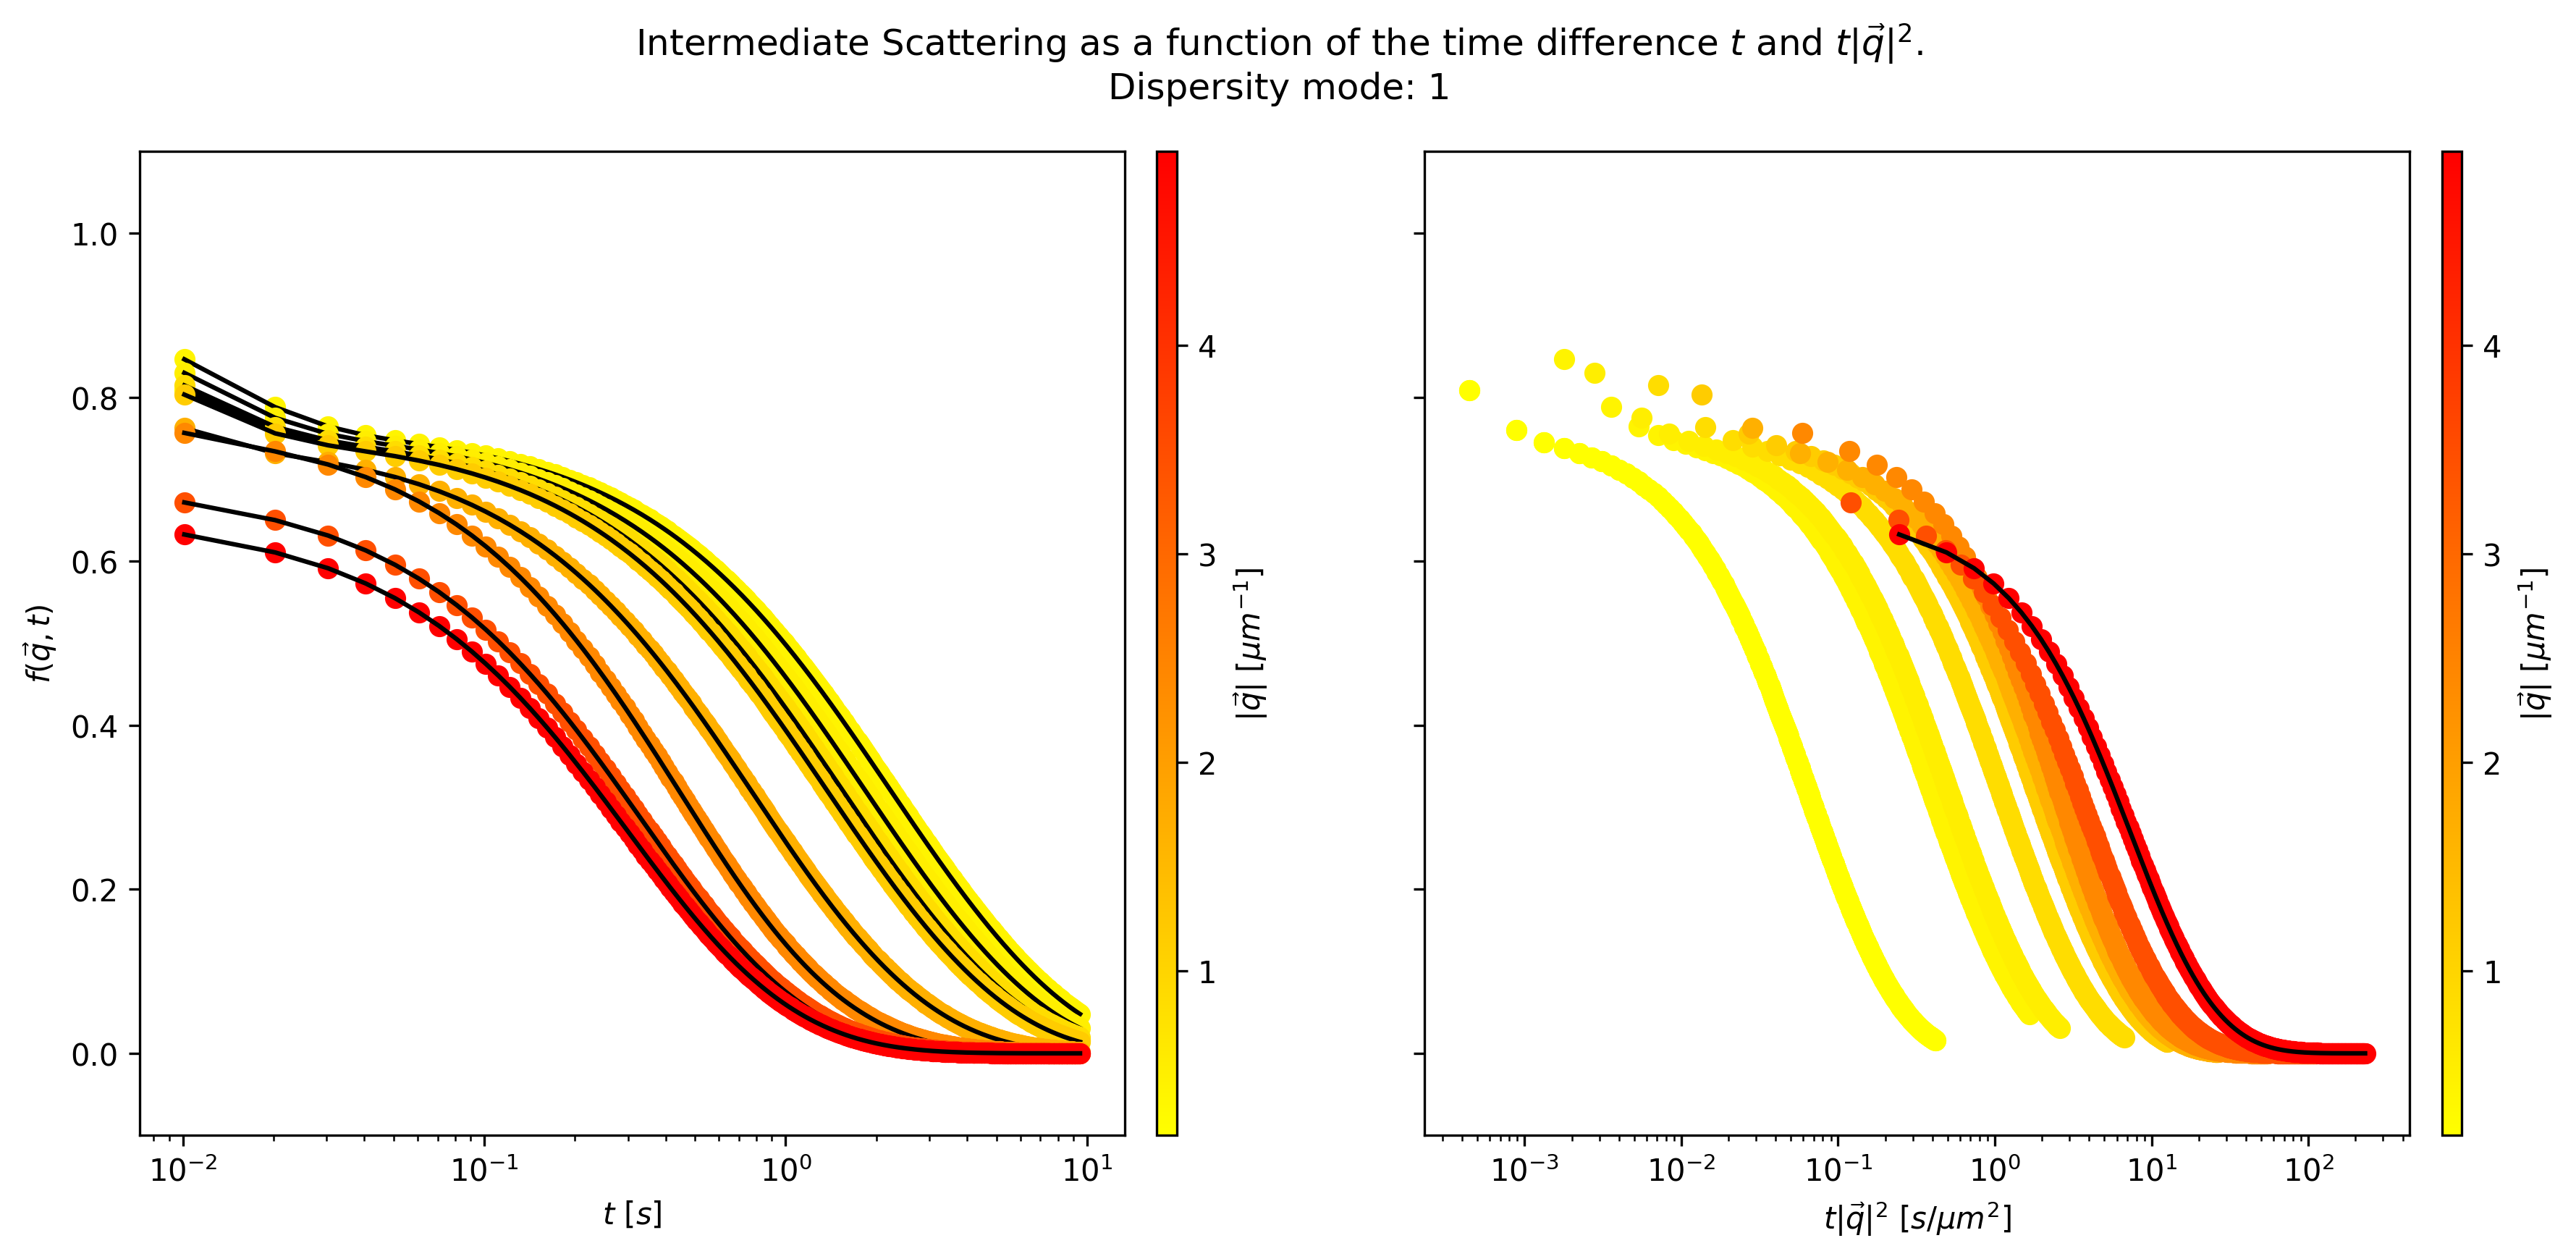

In [ ]:
fig = fit_result.plot_intermediate_scattering_function(1)

In [23]:
print(fit_result.get_diffusion_coefficients())
print(fit_result.get_particle_diameters())

# A: 0.211e-6
# B: 0.46e-6
# D: 0.977e-6

[0.34303868957476497, 0.17675312901323284, 0.07816648893861902]
[2.3717647412665247e-07, 4.6030702447298026e-07, 1.0408642883558361e-06]
